In [4]:
import pandas as pd

df = pd.read_csv('data/모델이용데이터.csv')


In [6]:
df

,Unnamed: 0,Unnamed: 0_우리팀,날짜_우리팀,게임결과_우리팀,1이닝점수_우리팀,2이닝점수_우리팀,3이닝점수_우리팀,4이닝점수_우리팀,5이닝점수_우리팀,6이닝점수_우리팀,...,3이닝점수_상대팀,4이닝점수_상대팀,5이닝점수_상대팀,6이닝점수_상대팀,7이닝점수_상대팀,8이닝점수_상대팀,9이닝점수_상대팀,10이닝점수_상대팀,11이닝점수_상대팀,12이닝점수_상대팀
0,0,0.0,2024-03-23,0.0,0.0,0.0,0.0,2.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
1,1,1.0,2024-03-24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4,0,1,2,0,0,0,0,0,0
2,2,2.0,2024-03-26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,0,0,0,0,0,0
3,3,3.0,2024-03-27,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,2024-03-28,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,139,139.0,2024-09-24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,2,0,0,0,0,0,0,0,0
138,140,140.0,2024-09-25,1.0,0.0,0.0,2.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
139,141,141.0,2024-09-27,1.0,0.0,2.0,0.0,3.0,0.0,0.0,...,0,0,0,0,0,2,0,1,0,0
140,142,142.0,2024-09-28,0.0,1.0,0.0,2.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,0,0


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드의 최소 샘플 수
    'max_features': ['auto', 'sqrt', 'log2'],  # 각 트리에서 고려할 특성의 수
    'bootstrap': [True, False]  # 샘플링 방식 (부트스트랩 여부)
}

# 모델 정의
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV 적용
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 데이터 분할
X = df[['1이닝점수_우리팀','1이닝점수_상대팀', '2이닝점수_우리팀' ,'2이닝점수_상대팀', 
                 '3이닝점수_우리팀', '3이닝점수_상대팀', '4이닝점수_우리팀','4이닝점수_상대팀', 
                 '5이닝점수_우리팀', '5이닝점수_상대팀', '6이닝점수_우리팀','6이닝점수_상대팀', 
               '7이닝점수_우리팀', '7이닝점수_상대팀', '8이닝점수_우리팀','8이닝점수_상대팀', 
               '9이닝점수_우리팀', '9이닝점수_상대팀', '10이닝점수_우리팀','10이닝점수_상대팀', 
               '11이닝점수_우리팀','11이닝점수_상대팀',  '12이닝점수_우리팀','12이닝점수_상대팀']]
y = df['게임결과_우리팀']

# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# GridSearchCV로 최적의 하이퍼파라미터 탐색
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)

# 최적 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 상세 평가 (혼동 행렬, 정밀도, 재현율 등)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
849 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\82102\anaconda3\envs\nof\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7442
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        25
         1.0       0.82      0.50      0.62        18

    accuracy                           0.74        43
   macro avg       0.77      0.71      0.71        43
weighted avg       0.76      0.74      0.73        43



Accuracy (전체 이닝 점수 모델): 0.7441860465116279
Classification Report (전체 이닝 점수 모델):
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        25
         1.0       0.82      0.50      0.62        18

    accuracy                           0.74        43
   macro avg       0.77      0.71      0.71        43
weighted avg       0.76      0.74      0.73        43



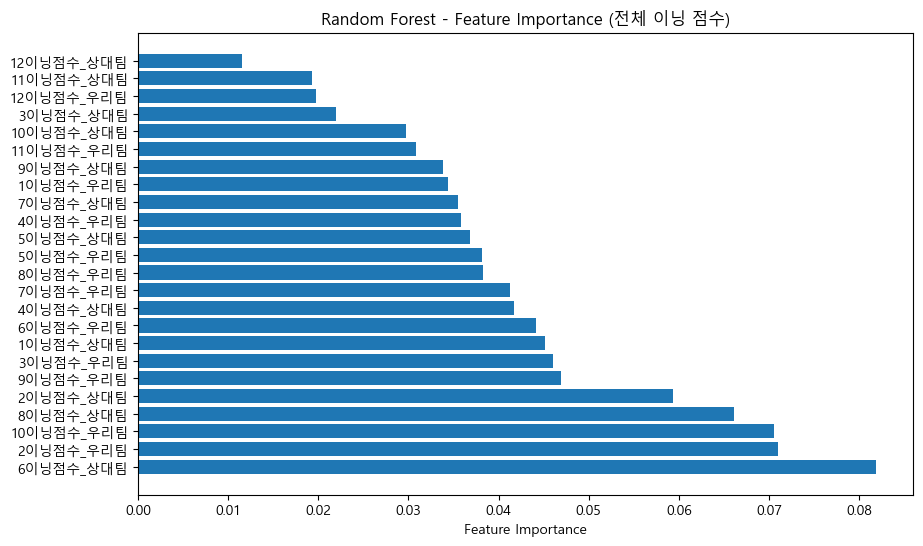

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# 2. 전체 이닝 점수를 포함한 모델
X = df[['1이닝점수_우리팀','1이닝점수_상대팀', '2이닝점수_우리팀' ,'2이닝점수_상대팀', 
                 '3이닝점수_우리팀', '3이닝점수_상대팀', '4이닝점수_우리팀','4이닝점수_상대팀', 
                 '5이닝점수_우리팀', '5이닝점수_상대팀', '6이닝점수_우리팀','6이닝점수_상대팀', 
               '7이닝점수_우리팀', '7이닝점수_상대팀', '8이닝점수_우리팀','8이닝점수_상대팀', 
               '9이닝점수_우리팀', '9이닝점수_상대팀', '10이닝점수_우리팀','10이닝점수_상대팀', 
               '11이닝점수_우리팀','11이닝점수_상대팀',  '12이닝점수_우리팀','12이닝점수_상대팀']]
y = df['게임결과_우리팀']

# 데이터 분할
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

# 최적 하이퍼파라미터를 적용하여 랜덤포레스트 모델 학습
rf_model2 = RandomForestClassifier(
    bootstrap=True, 
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=2, 
    min_samples_split=2, 
    n_estimators=100, 
    random_state=42
)

# 모델 학습
rf_model2.fit(X_train2, y_train2)

# 예측
y_pred2 = rf_model2.predict(X_test2)

# 정확도 및 평가 출력
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy (전체 이닝 점수 모델):", accuracy2)
print("Classification Report (전체 이닝 점수 모델):")
print(classification_report(y_test2, y_pred2))

# 특성 중요도 추출
feature_importances2 = rf_model2.feature_importances_

# 특성 중요도 시각화
features2 = X.columns
indices2 = np.argsort(feature_importances2)[::-1]  # 중요도가 높은 순으로 정렬

# 한글 폰트 설정 (Windows의 경우)
plt.rc('font', family='Malgun Gothic') 

# 시각화: 전체 이닝 점수 모델 특성 중요도
plt.figure(figsize=(10, 6))
plt.title("Random Forest - Feature Importance (전체 이닝 점수)")
plt.barh(range(len(features2)), feature_importances2[indices2], align="center")
plt.yticks(range(len(features2)), [features2[i] for i in indices2])
plt.xlabel("Feature Importance")
plt.show()


In [11]:
# 2. 전체 이닝 점수를 포함한 모델 특성 중요도 데이터프레임
feature_importances_df2 = pd.DataFrame({
    'Feature': features2,
    'Importance': feature_importances2
})

# 중요도를 내림차순으로 정렬
feature_importances_df2 = feature_importances_df2.sort_values(by='Importance', ascending=False)

In [12]:
feature_importances_df2

,Feature,Importance
11,6이닝점수_상대팀,0.081895
2,2이닝점수_우리팀,0.070985
18,10이닝점수_우리팀,0.070551
15,8이닝점수_상대팀,0.066138
3,2이닝점수_상대팀,0.059399
16,9이닝점수_우리팀,0.046936
4,3이닝점수_우리팀,0.045996
1,1이닝점수_상대팀,0.045162
10,6이닝점수_우리팀,0.044194
7,4이닝점수_상대팀,0.041740


In [13]:
feature_importances_df2.to_csv('data/2번중요도_계산.csv')